In [1]:
import os


import anndata
import matplotlib.pyplot as plt
import numpy as np
import pyometiff
import pandas as pd

In [2]:
PATH_TO_FOLDER = os.path.join('..', 'd4l')
TRAIN_DATA_PATH = os.path.join(PATH_TO_FOLDER, 'train')
# ORIGINAL_IMAGE_DATA_SUBDIR = 'images_masks'
# ORIGINAL_MASKS_SUBDIR = 'masks'
# ORIGINAL_IMAGES_SUBDIR = 'img'

if PATH_TO_FOLDER is None:
    raise ValueError('Please set PATH_TO_FOLDER to a path with unzipped training data.')

ANNDATA_PATH = 'cell_data.h5ad'
TRAIN_ANNDATA_PATH = os.path.join(TRAIN_DATA_PATH, ANNDATA_PATH)
# TRAIN_IMAGE_DATA_DIR = os.path.join(TRAIN_DATA_PATH, ORIGINAL_IMAGE_DATA_SUBDIR)
# TRAIN_IMAGE_DATA_IMAGES = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_IMAGES_SUBDIR)
# TRAIN_IMAGE_DATA_MASKS = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_MASKS_SUBDIR)

In [3]:
def normalize(expressions, scaling_factor=5):
    """
    Transform in CELESTA.ipynb
    
    Normalizes expression data using the arcsinh transformation.
    """
    expressions_transformed = np.arcsinh(expressions) / scaling_factor
    return expressions_transformed

def plot_marker_expressions(exp_df, norm_exp_df, markers):
    fig, axs = plt.subplots(len(markers), 2, figsize=(10, 5 * len(markers)))
    for i, gene in enumerate(markers):
        axs[i, 0].hist(exp_df[gene], bins=100, color='r', alpha=0.5)
        axs[i, 0].set_title(f'{gene} - Raw')
        axs[i, 1].hist(norm_exp_df[gene], bins=100, color='b', alpha=0.5)
        axs[i, 1].set_title(f'{gene} - Normalized')
    plt.show()

def plot_cell_type_count(exp_df):
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    ax.hist(exp_df['celltypes'], bins=30, color='r', alpha=0.5)
    ax.set_title('Cell Type Count')
    plt.show()

def plot_marker_expression_range(exp_df, markers):
    """
    Plot the range of expression values for each marker gene. Scatter plot of the minimum and maximum expression values.
    """
    fig, axs = plt.subplots(len(markers), 1, figsize=(15, 5 * len(markers)))
    for i, marker in enumerate(markers):
        axs[i].scatter(exp_df['celltypes'], exp_df[marker], color='g', alpha=0.5)
        axs[i].set_title(f'{marker} - Expression Range')
    plt.show()

In [4]:
train_anndata = anndata.read_h5ad(TRAIN_ANNDATA_PATH)

In [5]:
markers = train_anndata.var['marker']
expressions_df = pd.DataFrame(train_anndata.layers["exprs"], columns=markers)
normalized_expressions_df = normalize(expressions_df)
all_data = pd.concat([train_anndata.obs.reset_index(), normalized_expressions_df], axis=1)

In [41]:
print("There is a total of", len(all_data), "cells in the dataset.")

There is a total of 236791 cells in the dataset.


In [40]:
print("Minimal expression value: ", np.min(normalized_expressions_df.values))
print("Maximal expression value: ", np.max(normalized_expressions_df.values))
print("Mean expression value: ", np.mean(normalized_expressions_df.values))
print("Median expression value: ", np.median(normalized_expressions_df.values))
print("Maximal standard deviation of expression values: ", np.max(np.std(normalized_expressions_df.values, axis=0)))
print("Minimal standard deviation of expression values: ", np.min(np.std(normalized_expressions_df.values, axis=0)))

Minimal expression value:  0.0
Maximal expression value:  0.5658316572576292
Mean expression value:  0.1864588444609262
Median expression value:  0.16387416503213753
Maximal standard deviation of expression values:  0.14983342583054932
Minimal standard deviation of expression values:  0.030715705392487865


There are only non-negative marker expression values.

The 'distToCells' column is the only one containing NaN values, with a total of 11829 NaN entries.

In [17]:
all_data['distToCells'].isnull().sum()

11829

# General data overview

The dataset provided includes spatial information at the individual cell level. It includes X and Y coordinates, along with marker levels acquired through the IMC method, as well as cell types.

In [9]:
print(f"Dataset has {len(all_data['image'].unique())} tissue images from {len(all_data['sample_id'].unique())} unique subjects.")
print(f"Dataset has {len(all_data['celltypes'].unique())} unique cell types:", ", ".join(list(all_data['celltypes'].unique())))
print(f"Each cell has {len(normalized_expressions_df.columns)} features (marker expressions):", ", ".join(list(normalized_expressions_df.columns)))

Dataset has 125 tissue images from 125 unique subjects.
Dataset has 15 unique cell types: MacCD163, Mural, DC, Tumor, CD4, HLADR, NK, CD8, Treg, Neutrophil, plasma, undefined, B, pDC, BnT
Each cell has 40 features (marker expressions): MPO, HistoneH3, SMA, CD16, CD38, HLADR, CD27, CD15, CD45RA, CD163, B2M, CD20, CD68, Ido1, CD3, LAG3, CD11c, PD1, PDGFRb, CD7, GrzB, PDL1, TCF7, CD45RO, FOXP3, ICOS, CD8a, CarbonicAnhydrase, CD33, Ki67, VISTA, CD40, CD4, CD14, Ecad, CD303, CD206, cleavedPARP, DNA1, DNA2


### Data normalization
We performed arcsinh transformation on expression data as suggested.
Below we present distribution differences between original and normalized data for a couple of markers.

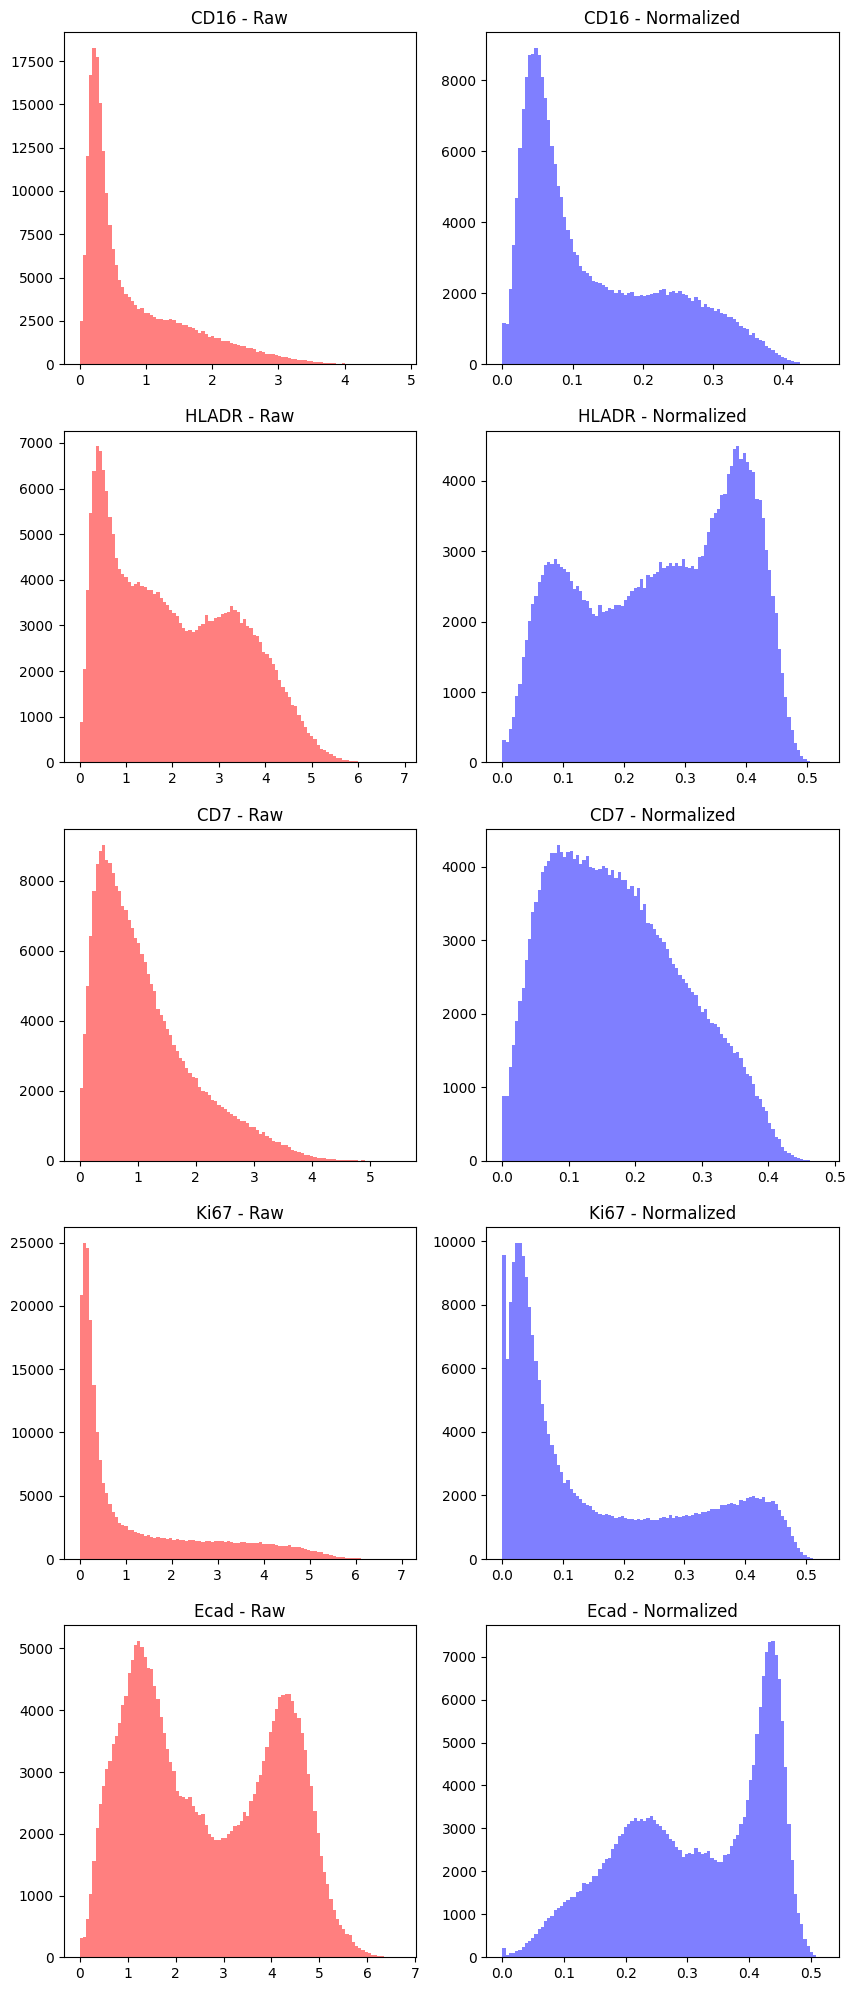

In [10]:
plot_marker_expressions(expressions_df, normalized_expressions_df, ['CD16', 'HLADR', 'CD7', 'Ki67', 'Ecad',])

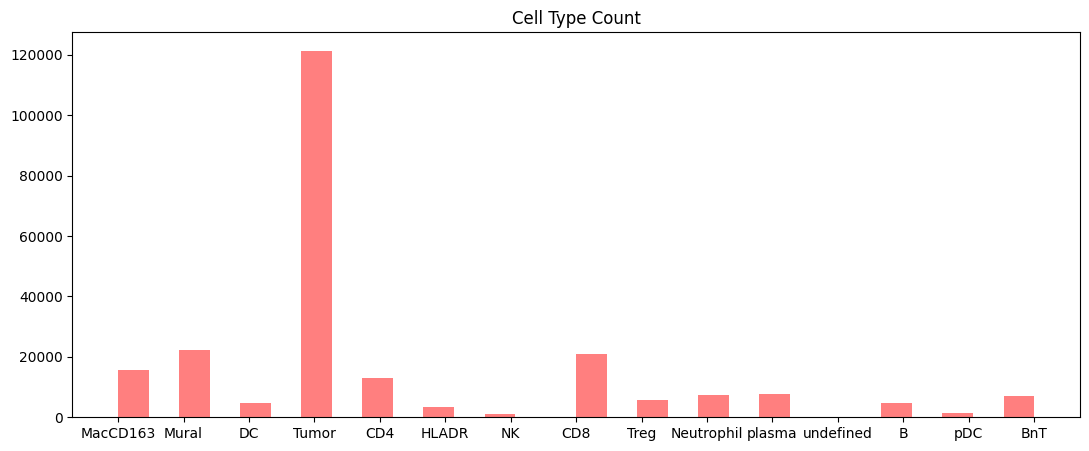

In [11]:
plot_cell_type_count(all_data)

Markers exhibit varying levels across different cell types, and we illustrate these discrepancies for a selection of markers.

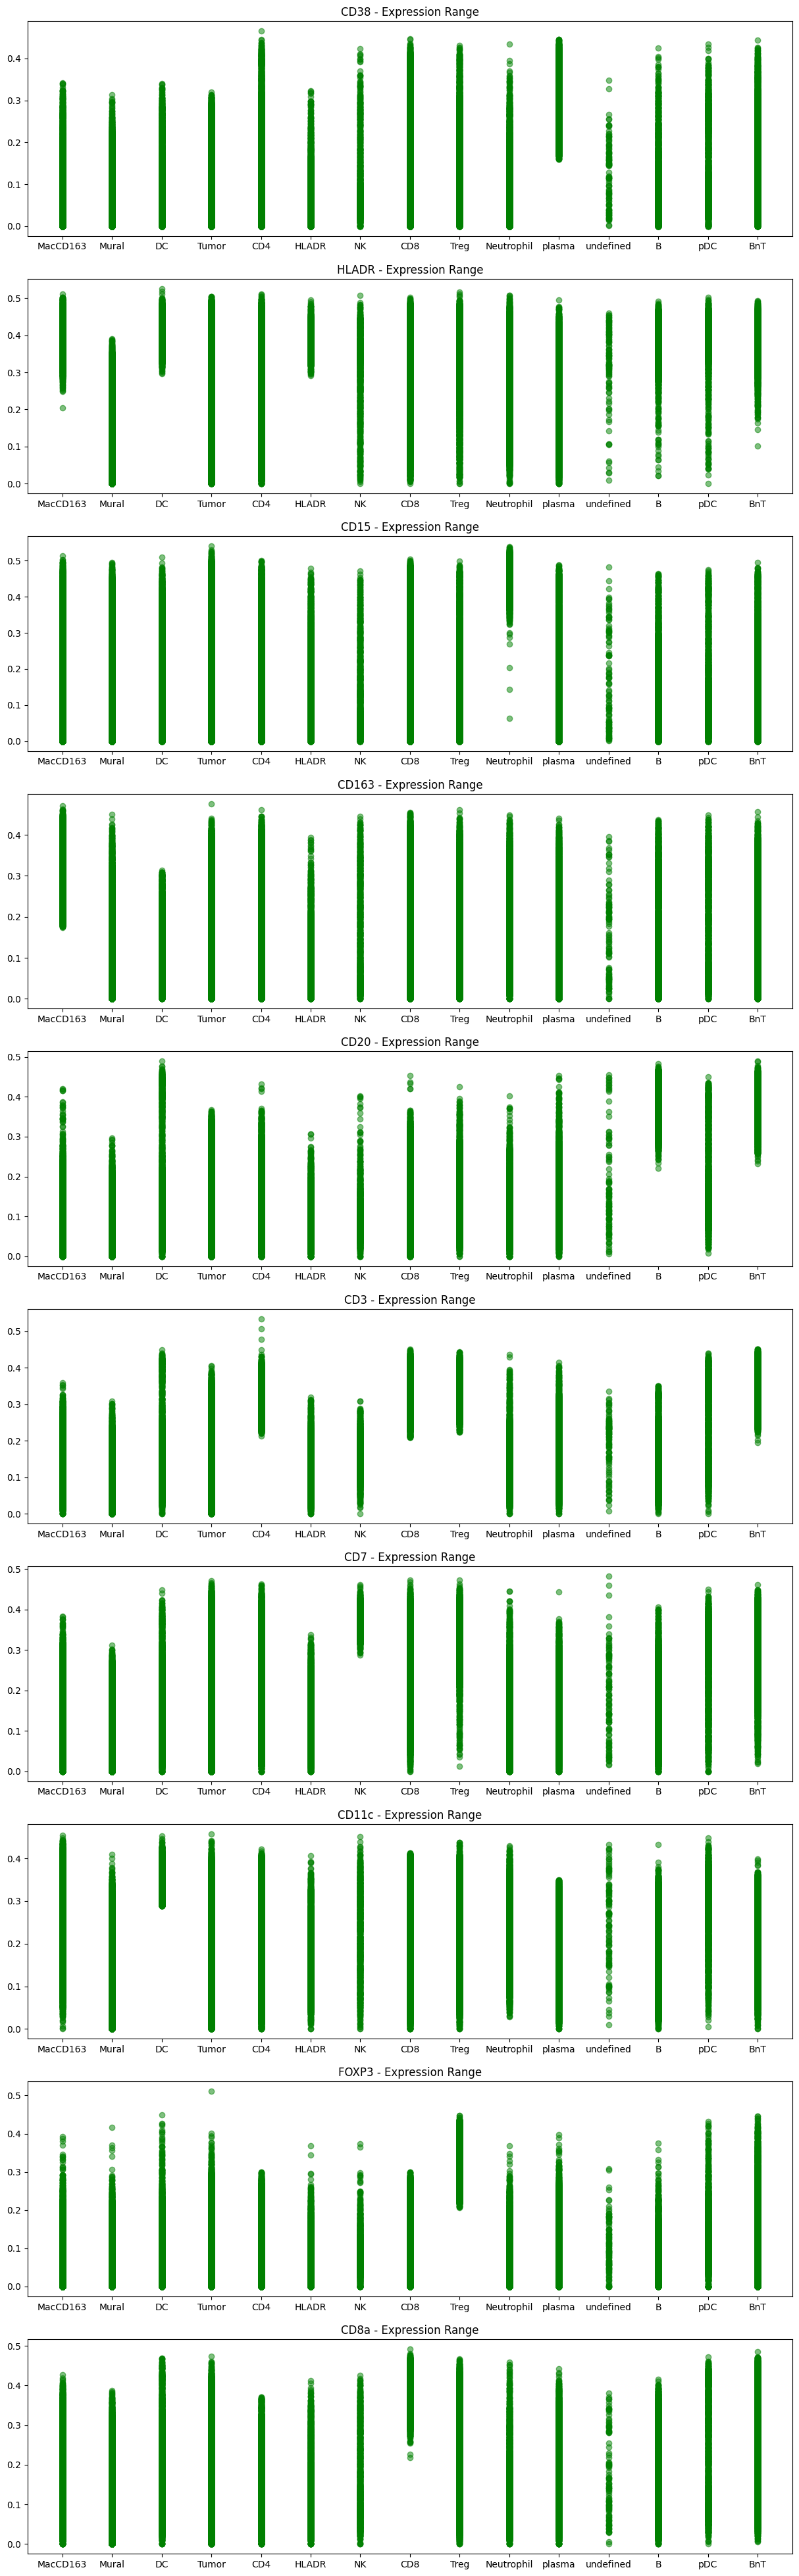

In [19]:
plot_marker_expression_range(all_data, ['CD38', 'HLADR', 'CD15', 'CD163', 'CD20', 'CD3', 'CD7', 'CD11c', 'FOXP3', 'CD8a'])